# Sprawdzanie dokładności modelu
Plik test_data.csv jest dostępny tylko dla jury. Zawiera dane testowe - jednakowe dla wszystkich drużyn. Jest w takim samym formacie co zbiór, który otrzymaliście wraz z zadaniem, tylko już z czystymi danymi.

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# test_data = pd.read_csv("test_data.csv")

### Miejsce na twój kod:

# Hamstersbusters (AI)

### Wczytanie dataset'u

In [6]:
df = pd.read_csv("final_train.csv")
# Usunięcie pierwszej kolumny z indeksami (niepotrzebna ponieważ pandas ma swoje indeksy)
df.drop(df.columns[0], axis=1, inplace=True)

### Usunięcie wszystkich wierszy zawierających wartość NaN (nieużywane)

In [34]:
# df.dropna(inplace=True)
# df

# Badania eksploracyjne (EDA)

Liczba klas: 6
Liczba kolumn: 571

### Wykres słupkowy pokazujący występowanie danych klas

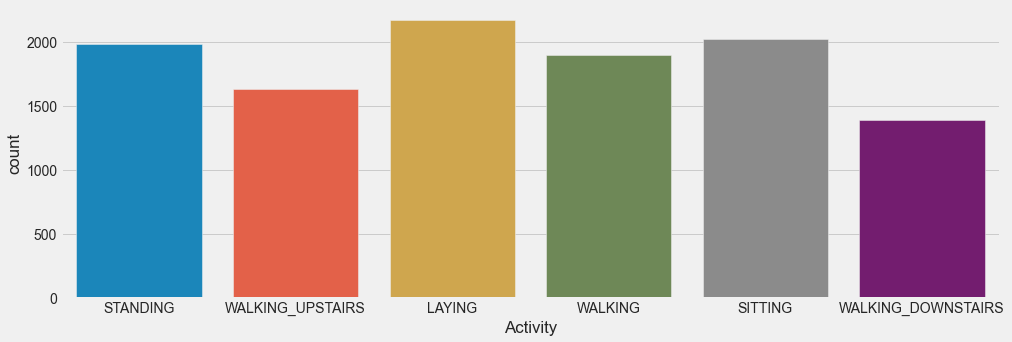

In [32]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="Activity", data=df)

## Czyszczenie danych
### Zastępowanie wartości NaN średnią wartości z kolumny, w której się znajduje.

In [5]:
df = pd.read_csv("final_train.csv")
df.fillna(df.mean(), inplace=True)
df

,Unnamed: 0,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,4,LAYING,-1.548333,-0.139628,-2.380889,-1.860175,0.067613,-0.887342,6.007361,-11.970485,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,11081,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,3.534816,-0.544652,2.0
11082,11082,LAYING,-1.550288,-0.231565,-2.376561,-1.868524,0.007653,-0.077020,5.494466,-5.860692,...,5.048737,2.923856,5.182026,-0.998495,2.853755,-0.933561,-1.000173,-1.984575,1.372763,1.0
11083,11083,WALKING_UPSTAIRS,-1.569815,-0.794940,-2.482325,-1.784151,0.021844,-0.740329,8.005261,-11.916107,...,4.453514,4.302852,2.979961,-6.032382,1.853029,-0.802817,0.041975,3.427548,-0.075184,1.0
11084,11084,WALKING_DOWNSTAIRS,-1.574768,-0.752847,-2.449529,-1.737755,-0.189761,-0.454246,8.054443,-5.611277,...,4.615939,4.443277,3.208597,-6.200222,1.675269,-0.828934,-0.877004,3.385405,-0.383217,3.0


## Redukcja wymiarowości
### Skalowanie 

In [6]:
columns = df.drop(['Activity'], axis=1).columns

col_values = df.loc[:, columns].values
activ_values = df.loc[:,['Activity']].values
scaled_df = StandardScaler().fit_transform(col_values)
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
0,-1.731895,-0.746711,-0.576426,-0.228224,-2.188517e-02,0.105415,-1.675518,-1.121035,-0.408418,0.686307,...,0.747550,0.063430,0.661831,0.864236,0.637008,-0.689001,-0.722714,0.819173,0.627871,-1.406635
1,-1.731582,-0.187438,0.009843,-1.257162,1.550554e+00,0.536925,0.391961,1.336382,1.628610,-0.537703,...,-0.702212,1.049211,-0.841848,0.094853,-0.896061,0.969655,0.913064,-1.447907,-0.871935,-0.154816
2,-1.731270,1.871934,1.446038,1.946786,-7.828840e-01,-0.096021,-0.655962,0.345767,-0.971836,0.685629,...,0.778960,-0.759681,0.861664,0.976969,0.872379,-0.875639,-0.812256,-1.398062,0.867916,1.097003
3,-1.730957,-0.736857,-0.539208,-0.112782,2.478659e-01,-1.202943,-0.712799,-1.641024,-0.971655,0.391920,...,0.182941,0.827130,-0.293604,1.070633,-0.150095,0.276530,0.446999,0.290889,-0.130330,-0.154816
4,-1.730645,1.871934,1.446038,1.946786,-1.673183e-13,-0.096021,-0.655962,0.345767,-0.986563,0.685629,...,0.778960,-0.759681,0.861664,0.976969,0.872379,-0.875639,-0.812256,-1.411263,0.867916,1.097003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,1.730645,-0.187438,0.009843,-1.257162,1.550554e+00,0.536925,0.391961,1.336382,1.628610,-0.537703,...,-0.702212,1.049211,-0.841848,0.094853,-0.896061,0.969655,0.913064,1.008269,-0.871935,-0.154816
11082,1.730957,1.674016,1.166880,2.075812,-1.187023e-01,-0.348153,0.071281,0.084682,0.428613,0.664875,...,0.746374,-0.230512,0.727301,0.792013,0.400079,-0.765398,-0.694448,-1.360645,0.426584,-1.406635
11083,1.731270,-0.303560,-0.543756,-1.077873,1.080882e+00,-0.288481,-0.524022,1.362780,-0.973968,-0.392129,...,-1.037697,0.932852,-1.097435,-1.283205,-0.729375,1.279313,3.221886,0.962230,-0.554000,-1.406635
11084,1.731582,-0.805155,-0.415942,-0.099950,1.740528e+00,-1.178285,-0.267270,1.387815,0.486383,-0.581543,...,-0.550859,1.051319,-0.907976,-1.352397,-0.930001,0.870863,-0.231587,0.944142,-0.762608,1.097003


#### PCA

In [7]:
pca = PCA()
df_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(df_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
0,-9.941410,0.507202,3.093108,4.231815,-3.615700,2.386325,1.408874,-0.753586,3.360245,2.016965,...,-0.004489,-0.004558,-0.000893,0.003166,0.000225,0.000038,-0.012329,-0.004309,-0.002836,-0.009781
1,15.342632,-12.163470,5.972841,-6.434842,-0.645870,-1.773168,0.878574,0.501749,1.259381,0.297692,...,0.000118,-0.000884,-0.003317,-0.000599,-0.000463,0.001653,0.000063,0.001893,0.000167,-0.000181
2,-14.767696,5.736865,-4.198470,-7.576607,0.739497,0.236269,0.942093,0.204807,0.020814,0.241756,...,-0.001087,-0.000004,-0.002575,-0.001663,0.000557,-0.000285,0.001633,0.002714,-0.000939,0.000553
3,4.195016,-4.258960,-2.731571,0.844444,-4.453477,1.829968,0.056979,2.548067,1.221060,-0.510515,...,0.011801,-0.007225,0.004501,-0.015073,-0.008002,0.000161,0.028735,-0.002016,-0.005509,0.009103
4,-14.540448,5.608502,-4.056445,-7.398319,0.715972,0.191106,0.945560,0.174416,-0.042485,0.300503,...,0.109607,-0.037841,0.075451,0.041361,-0.082144,0.049899,-0.015181,0.019801,0.072728,-0.053270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,15.302158,-12.171079,5.984155,-6.443370,-0.638359,-1.774363,0.891037,0.520502,1.261094,0.274747,...,0.000704,0.000491,-0.001423,0.002167,0.000671,0.002607,-0.003491,0.000715,0.000849,-0.000543
11082,-8.571170,-3.311423,-10.537359,-3.943622,2.976619,4.255964,5.772522,1.470302,-0.971994,-0.459670,...,-0.005173,-0.000637,0.023000,0.017767,-0.013188,0.017596,0.035296,-0.018940,0.018993,-0.004205
11083,15.006213,-5.540178,-2.808006,0.415474,5.132867,2.653826,-6.317277,-1.372000,-3.500512,0.793705,...,-0.023306,0.006028,-0.006781,-0.008930,0.005516,-0.014753,-0.007494,0.011070,0.010353,0.015658
11084,11.000973,-9.596678,-8.439994,1.522301,0.103109,-3.589839,0.076159,4.288161,0.429327,-4.933613,...,-0.006941,-0.013070,0.045896,-0.034035,-0.075770,0.007924,-0.069059,-0.076558,-0.048810,0.018370


#### Explained variance

In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance[0:65].sum()


0.9008843327070212

In [9]:
target = df["Activity"]

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(df_pca.iloc[:, :65], target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:65], target, test_size=0.3, random_state=1)

predicted = np.mean(clf.predict(X_test) == y_test)

predicted

### Sprawdzanie dokładności:
Predicted - zmienna przechowująca przewidzianą aktywność. Poniższa linijka powinna zwrócić wartość 0-1.

In [10]:
np.mean(predicted == test_data.Activity)

NameError: name 'predicted' is not defined